In [1]:
from astropy import coordinates as coords
from astropy.table import Table 
from astropy.io import fits as pyfits 
import astropy.units as u
from astropy.nddata import Cutout2D
import astropy.wcs as pywcs

import glob

import numpy as np
import matplotlib.pyplot as mpl

from astropy.utils.data import download_file

import dopterian


In [2]:
califa_table = Table.read("CALIFAdr2SN",format="fits")
califa_table

MAIN_ID,OTYPE_S,RA_d,DEC_d,RA2000,DEC2000
,,deg,deg,hms,dms
bytes23,bytes13,float64,float64,bytes11,bytes11
SN 2003lq,SN,0.76675,-1.91264,00:03:04.02,-01:54:45.5
UGC 5,AGN,0.7735524676707,-1.9138655259959,00:03:05.65,-01:54:49.9
SN 2000da,SN,0.77717,-1.91161,00:03:06.52,-01:54:41.8
UGC 139,EmG,3.6328,-0.737675,00:14:31.87,-00:44:15.6
SN 1998dk,SN,3.634,-0.73636,00:14:32.16,-00:44:10.9
UGC 148,Galaxy,3.963642,16.089803,00:15:51.27,+16:05:23.3
SN 2003ld,SN,3.96604,16.08933,00:15:51.85,+16:05:21.6
SN 2007A,SN,6.31942,12.88681,00:25:16.66,+12:53:12.5


In [3]:
califa_table["RA_d"].unit = u.deg
califa_table["DEC_d"].unit = u.deg

In [4]:
catalog_coords = coords.SkyCoord(califa_table["RA2000"],califa_table["DEC2000"],frame="icrs",\
                                 unit=(u.hourangle, u.deg))

In [5]:
for i in range(len(califa_table)):
    
    if "SN" in califa_table["MAIN_ID"][i]:
        continue
#     xid = SDSS.query_region(catalog_coords[i],radius=0.5*u.arcsec,data_release=12)
#     imgs = SDSS.get_images(matches=xid)
    name = califa_table["MAIN_ID"][i]
    nameCompact = ''.join(name.strip().split())
    ra = catalog_coords[i].ra.deg
    dec = catalog_coords[i].dec.deg
    print(f"{nameCompact}  {ra:8.5f}  {dec:8.5f}")

    
### PASTE LIST TEXT IN http://skyserver.sdss.org/dr15/en/tools/crossid/crossid.aspx
### SAVE TABLE AS FITS

UGC5   0.77354  -1.91386
UGC139   3.63279  -0.73767
UGC148   3.96362  16.08981
NGC105   6.31979  12.88386
NGC175   9.33967  -19.93425
NGC180   9.49037   8.63522
NGC214  10.36675  25.49939
MCG-02-02-086  10.46021  -9.30319
NGC309  14.17775  -9.91392
NGC477  20.33475  40.48817
NGC495  20.73317  33.47139
NGC523  21.33642  34.02517
UGC1087  22.86096  14.27750
M74  24.17404  15.78347
NGC774  29.89475  14.00822
NGC776  29.97717  23.64428
IC208  32.11558   6.39486
NGC930  36.97783  20.33264
NGC941  37.11604  -1.15156
NGC938  37.13967  20.28372
NGC976  38.50004  20.97681
NGC991  38.88617  -7.15439
UGC2134  39.71579  27.84719
NGC1056  40.70121  28.57428
NGC1060  40.81271  32.42500
NGC1070  40.84279   4.96839
NGC1058  40.87508  37.34133
NGC1093  42.06721  34.41981
MCG-01-09-006  47.20150  -7.04058
IC307  48.43837  -0.24150
MCG-01-10-019  55.17900  -6.41511
NGC1637  70.36762  -2.85803
UGC3151  71.33175  11.06792
NGC1667  72.15504  -6.31986
UGC3555  102.49867  25.63439
NGC2347  109.01704  64.71153

In [6]:
# LOAD TABLE
table_crossid = Table.read("CALIFAdr2SN_crossID.fits",format="fits")
table_crossid["z"] = 0.017
table_crossid

name,objID,ra,dec,run,rerun,camcol,field,type,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,z
bytes32,int64,float64,float64,int16,int16,uint8,int16,bytes40,float32,float32,float32,float32,float32,float64
UGC5,1237672796105670812,0.7735184352651459,-1.9138345567472188,6361,301,6,11,GALAXY,15.483781,14.003523,13.201407,12.792016,12.500581,0.017
UGC139,1237663783125254177,3.6327229181055394,-0.7375552761900194,4263,301,2,140,GALAXY,15.867189,14.395446,13.814678,13.473217,13.276262,0.017
UGC148,1237653653447245873,3.9637311847263845,16.089821994475432,1904,301,6,176,GALAXY,15.023324,14.029266,13.39119,13.052284,12.73981,0.017
NGC105,1237678859548033106,6.319800247697913,12.883853241427328,7773,301,4,351,GALAXY,15.223777,13.987458,13.281935,12.919818,12.653791,0.017
NGC175,1237672795577516109,9.339801959895055,-19.93423503106273,6361,301,5,144,GALAXY,15.056718,13.071557,12.232813,11.802488,11.521658,0.017
NGC180,1237669703732363305,9.490426481816996,8.635149401398905,5641,301,6,59,GALAXY,14.962637,13.411362,12.596798,13.896339,11.862462,0.017
NGC214,1237678580906590258,10.366814982008918,25.499366604037853,7708,301,5,268,GALAXY,15.018852,12.981546,12.158842,11.773812,11.496884,0.017
MCG-02-02-086,1237652948530167954,10.460211432711489,-9.303183532585383,1740,301,5,91,GALAXY,21.383757,19.11416,18.286674,17.83102,17.560148,0.017
NGC309,1237652947457998886,14.177751924516059,-9.913864293921874,1740,301,3,115,GALAXY,15.096983,13.449218,12.597866,12.198862,11.898287,0.017


# Functions to download data

In [7]:
import os
import subprocess as sp

SDSS_FILTERS = ['u','g','r','i','z']                                           #set the filters list of the SDSS

ngalaxies = len(table_crossid['name'])
root = os.getcwd()

def download_photofield(run,camcol,rerun=301):
    root_url="http://dr9.sdss3.org/sas/dr9/boss/photoObj"  #set root url from which to download the photoField Images
    spec_url='%s/%i/%i/'%(root_url,rerun,run)                  #set specific url using the run of the frame image
    img_name='photoField-%06i-%i.fits'%(run,camcol)         #set name of the photoField file usinf run and camcol of the frame image
    return download_file(spec_url+img_name),img_name

def download_psf(run,camcol,field,rerun=301):
    root_url="http://dr9.sdss3.org/sas/dr9/boss/photo/redux/"
    spec_url=root_url+'%i/%i/objcs/%i/'%(rerun,run,camcol)
    img_name='psField-%06i-%i-%04i.fit'%(run,camcol,field)
    return download_file(spec_url+img_name),img_name

def download_frames(run,camcol,field,rerun=301,band='r'):
    root_url="http://dr9.sdss3.org/sas/dr9/boss/photoObj/frames"
    spec_url="%s/%i/%i/%i/"%(root_url,rerun,run,camcol)
    img_name="frame-%s-%06i-%i-%04i.fits.bz2"%(band,run,camcol,field)
    return download_file(spec_url+img_name),img_name


def update_header(header, run,camcol,field,rerun, sdss_filter):
    filename,_ = download_photofield(run,camcol,rerun)
    band = SDSS_FILTERS.index(sdss_filter)
    hdu=pyfits.open(filename)            #open the photoField image using the retrieved numbers
    table=hdu[1].data                                                       #define the data table as the second extension of the fits file
    FIELDS=table.field('field')                                             #define the subtable containg the field numbers
    gain=table.field('gain')[FIELDS==field][0,int(band)]                  
    rdnoise=table.field('dark_variance')[FIELDS==field][0,int(band)]      #select subtables containg keywords of interest and selecting the values
    airmass=table.field('airmass')[FIELDS==field][0,int(band)]            # for the field of the frame image and the band ('ugriz'<->'12345')
    sky_nmgy=table.field('sky_frames_sub')[FIELDS==field][0,int(band)]  

    header['GAIN'] = (gain,'Gain value from photoField')                            #create gain keyword
    header['RDNOISE'] = (rdnoise,'Dark_Variance value from photoField')             #create rdnoise keyword
    header['AIRMASS'] = (airmass,'Airmass value from photoField')                   #create airmass keyword
    header['FILTERS'] = (SDSS_FILTERS[band],'Filter of this image')                    #create filters keyword
    header['SKY_NMGY'] = (sky_nmgy,'Sky value (in nmgy) obtained from photoField')  #create sky_nmgy keyword
    return 

def galaxy_cutout(path,run,camcol,field,rerun,band,savename,position,size):
    filename,_ = download_frames(run,camcol,field,rerun,band)

    fileHDU = pyfits.open(filename)
    
    fileWCS = pywcs.WCS(fileHDU[0].header)
    fileData = fileHDU[0].data
    
    update_header(fileHDU[0].header,run,camcol,field,rerun,band)
    
    cutout = Cutout2D(fileData,position,size,wcs=fileWCS)
    
    exptime = float(fileHDU[0].header["exptime"])
    nmgy = float(fileHDU[0].header["nmgy"])
    
    fileHDU[0].data = cutout.data * (exptime/nmgy)
    fileHDU[0].header.update(cutout.wcs.to_header())
    
    fileHDU.writeto(f"{path}/{savename}", overwrite=True)
    
    psf = reconstruct_psf(cutout.center_original,band,run,camcol,field,rerun)
    psfHDU = pyfits.PrimaryHDU(psf)
    psfHDU.writeto(f"{path}/psf_{band}band.fits", overwrite=True)
    return cutout

def reconstruct_psf(position,sdss_filter,run,camcol,field,rerun):
    psfield_file,_ = download_psf(run,camcol,field,rerun)
    band = SDSS_FILTERS.index(sdss_filter) + 1 
    ## u,g,r,i,z == 0,1,2,3,4, which means these bands can be found in extensions 1,2,3,4,5
    x,y = position

    pstruct = pyfits.getdata(psfield_file, ext=band)
    nrow_b = pstruct["nrow_b"][0]
    ncol_b =pstruct["ncol_b"][0]

    rnrow = pstruct["RNROW"][0]
    rncol = pstruct["RNCOL"][0]

    nb = nrow_b * ncol_b
    coeffs = np.zeros(nb)
    ecoeff = np.zeros(3)
    cmat = pstruct["c"]

    rcs = 0.001
    for i in range(nb):
        coeffs[i] = (x*rcs)**(i % nrow_b) * (y * rcs) ** (i/nrow_b)

    for j in range(3):
        for i in range(nb):
            ecoeff[j] += cmat[int(i/nrow_b),i % nrow_b,j] * coeffs[i]

    psf = pstruct["RROWS"][0]*ecoeff[0] +\
          pstruct["RROWS"][1]*ecoeff[1] +\
          pstruct["RROWS"][2]*ecoeff[2]

    psf = psf.reshape(rnrow,rncol)

    psf /= np.sum(psf)

    return psf

## DOWNLOAD DATA CYCLE

In [8]:
SIZE_CUTOUT = 90*u.arcsec


bands = ["r"]
for i in range(ngalaxies):
    path = "%s/%s"%(root,table_crossid['name'][i])

    if not os.path.isdir(path):
        sp.call('mkdir %s'%(path),shell=True)

    run=table_crossid['run'][i]
    rerun=table_crossid['rerun'][i]
    camcol=table_crossid['camcol'][i]
    field=table_crossid['field'][i]
    
    position = coords.SkyCoord(table_crossid["ra"][i],table_crossid["dec"][i],unit=u.deg,frame="icrs")

    for band in bands:
        gct = galaxy_cutout(path,run,camcol,field,rerun,band,f"galaxy_{band}band.fits",position,SIZE_CUTOUT)
        
    break

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


# RUN DOPTERIAN

In [9]:
band = "r"

z_high = 0.4
for i in range(ngalaxies):
    path = "%s/%s"%(root,table_crossid['name'][i])

    PlowName=f'{path}/psf_{band}band.fits'
    PhighName='HST/psf_acs.fits'
    BgName='HST/sky_ACSTILE_40x40.fits'
    InputImName=f'{path}/galaxy_{band}band.fits'
    redshift = table_crossid["z"][i]
    
    lowz_info = {'redshift':redshift,'psf':PlowName,'zp':28.235952,\
                 'exptime':53.907456,'filter':'r',\
                 'lam_eff':6185.0,'pixscale':0.396}
    highz_info = {'redshift':z_high,\
                  'psf':PhighName,'zp':25.947,\
                  'exptime':6900.,'filter':'f814w',\
                  'lam_eff':8140.0,'pixscale':0.03}
    
    imOUT,psfOUT = dopterian.ferengi(InputImName,BgName,lowz_info,highz_info,\
                           [f'{path}/galaxy_z{z_high*100:.0f}.fits',\
                            f'{path}/psf_z{z_high*100:.0f}.fits'],\
                           noconv=False,evo=dopterian.lum_evolution)
    
    break 

IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 2307705.930647625 2575.737793778326 -31.384869743273256
IM_DOWNSCALE_median_nans 2307705.930647625 2575.737793778326 -31.384869743273256
IM_DOWNSCALE_median_zeros 2307705.930647625 2575.737793778326 -31.384869743273256
IM_DOWNSCALE_sky 2230182.4497660217 2573.656570634574 -33.466092887024864
PSF_transformation 1.0001061327053666 0.11520236022596167 -0.006292739016924962
PSF_reconstruction 0.9997093474945813 0.04705708121263141 -1.204440407162384e-06
Final Image 316.94860585978057 0.23988993997809638 -0.017676702761833862
(193, 193)


# Create Movie

In [42]:
band = "r"


path = "%s/%s"%(root,table_crossid['name'][0])
InputImName=f'{path}/galaxy_{band}band.fits'
PlowName=f'{path}/psf_{band}band.fits'
PhighName='HST/psf_acs.fits'
BgName='HST/sky_ACSTILE_40x40.fits'
redshift = table_crossid["z"][0]


all_data_evo = [pyfits.getdata(InputImName)/float(pyfits.getheader(InputImName)["EXPTIME"])]
all_data_dim = [pyfits.getdata(InputImName)/float(pyfits.getheader(InputImName)["EXPTIME"])]

zs_high = np.arange(0.1,1.5,0.01)
for i in range(zs_high.size):


    lowz_info = {'redshift':redshift,'psf':PlowName,'zp':28.235952,\
                 'exptime':53.907456,'filter':'r',\
                 'lam_eff':6185.0,'pixscale':0.396}
    highz_info = {'redshift':zs_high[i],\
                  'psf':PhighName,'zp':25.947,\
                  'exptime':6900.,'filter':'f814w',\
                  'lam_eff':8140.0,'pixscale':0.06}
    
    imOUT,psfOUT = dopterian.ferengi(InputImName,BgName,lowz_info,highz_info,\
                           None,\
                           noconv=False,evo=dopterian.lum_evolution)

    all_data_evo.append(imOUT)

    imOUT,psfOUT = dopterian.ferengi(InputImName,BgName,lowz_info,highz_info,\
                           None,\
                           noconv=False,evo=None)
    all_data_dim.append(imOUT)

    
#     fig,ax = mpl.subplots()
#     ax.set_xticks([])
#     ax.set_yticks([])
#     img = ax.imshow(imOUT,extent=(-1,1,-1,1))
#     ax.text(0.95,0.95,f"z={zs_high[i]:4.2f}",color="white",va="top",ha="right",weight="bold")
#     fig.savefig(f"{path}/img{i:04d}.png")

IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 29590260.0114908 16225.739315028859 -272.0778712416749
IM_DOWNSCALE_median_nans 29590260.0114908 16225.739315028859 -272.0778712416749
IM_DOWNSCALE_median_zeros 29590260.0114908 16225.739315028859 -272.0778712416749
IM_DOWNSCALE_sky 28579759.531876042 16212.941851982358 -284.87533428817574
PSF_transformation 1.0000446805288405 0.28078788707801855 -0.08196857394072081
PSF_reconstruction 0.999644421827359 0.04780766361438094 -3.0766565704814844e-06
Final Image 4122.855823210205 1.8734401528397955 -0.027665820578051975
(281, 281)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 26677724.380615696 14628.658252748208 -245.2975558927629
IM_DOWNSCALE_median_nans 26677724.380615696 14628.658252748208 -245.2975558927629
IM_DOWNSCALE_median_zeros 26677724.380615696 14628.658252748208 -245.2975558927629
IM_DOWNSCALE_sky 25766686.313658066 14617.120429430905 -256.8353792100668
PSF_transformation 1.0000446805288405 0.28078788707801855 -0.081968

IM_DOWNSCALE_sky 10357324.318176277 13710.474075915557 -176.87461670419054
PSF_transformation 1.0000967315447684 0.10288866120131325 -0.005652828902684099
PSF_reconstruction 0.9997223399694867 0.04702245992997942 -7.535109306631156e-07
Final Image 1493.9997188287791 1.2517635833956557 -0.02061258920666096
(179, 179)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 8978527.02311897 11505.326194703463 -139.13345181441457
IM_DOWNSCALE_median_nans 8978527.02311897 11505.326194703463 -139.13345181441457
IM_DOWNSCALE_median_zeros 8978527.02311897 11505.326194703463 -139.13345181441457
IM_DOWNSCALE_sky 8684555.111156397 11496.151327752912 -148.30831876496455
PSF_transformation 1.0000967315447684 0.10288866120131325 -0.005652828902684099
PSF_reconstruction 0.9997223399694867 0.04702245992997942 -7.535109306631156e-07
Final Image 1251.6488531816308 1.0223273574962328 -0.018861432908324226
(179, 179)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 9616260.584233245 13406.861062248634 -171

PSF_transformation 1.000057221072874 0.07844530290056555 -0.0035333599990020224
PSF_reconstruction 0.9997606333539273 0.046946519833749686 -4.924517601243108e-07
Final Image 784.6214828533945 0.9339335802791787 -0.015447651323233664
(137, 137)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 4401808.084101765 9280.127480995972 -101.37577887555143
IM_DOWNSCALE_median_nans 4401808.084101765 9280.127480995972 -101.37577887555143
IM_DOWNSCALE_median_zeros 4401808.084101765 9280.127480995972 -101.37577887555143
IM_DOWNSCALE_sky 4257064.326037305 9272.41562857632 -109.08763129520412
PSF_transformation 1.000057221072874 0.07844530290056555 -0.0035333599990020224
PSF_reconstruction 0.9997606333539273 0.046946519833749686 -4.924517601243108e-07
Final Image 610.9999807390885 0.7406296076610251 -0.015796103663394092
(137, 137)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 5240660.691545005 11844.737916061104 -114.82649381212327
IM_DOWNSCALE_median_nans 5240660.691545005 11844.73791606110

PSF_transformation 1.0000335027067826 0.06710919825806187 -0.0021554643160564867
PSF_reconstruction 0.999781224821151 0.04689734628752731 -3.137517491952858e-07
Final Image 494.2375652696956 0.7734200666337478 -0.014614548810588641
(114, 114)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 2588385.4606640683 7495.048782786625 -64.20878983893905
IM_DOWNSCALE_median_nans 2588385.4606640683 7495.048782786625 -64.20878983893905
IM_DOWNSCALE_median_zeros 2588385.4606640683 7495.048782786625 -64.20878983893905
IM_DOWNSCALE_sky 2506381.6215852825 7488.738853648522 -70.51871897704201
PSF_transformation 1.0000335027067826 0.06710919825806187 -0.0021554643160564867
PSF_reconstruction 0.999781224821151 0.04689734628752731 -3.137517491952858e-07
Final Image 357.4752872326336 0.5445316296963449 -0.014247107093461735
(114, 114)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 3375951.057429353 10602.638798525022 -96.90044350547255
IM_DOWNSCALE_median_nans 3375951.057429353 10602.638798525022 

PSF_transformation 1.000012483548369 0.06062143102176605 -0.0012711278999118915
PSF_reconstruction 0.99979994339114 0.04688639496117356 -2.936569156420953e-07
Final Image 347.9444541955886 0.6357597627222579 -0.014378694969471372
(100, 100)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1695954.2933267504 6159.38823230395 -50.76742163580787
IM_DOWNSCALE_median_nans 1695954.2933267504 6159.38823230395 -50.76742163580787
IM_DOWNSCALE_median_zeros 1695954.2933267504 6159.38823230395 -50.76742163580787
IM_DOWNSCALE_sky 1640386.3487180201 6153.831437843077 -56.32421609668091
PSF_transformation 1.000012483548369 0.06062143102176605 -0.0012711278999118915
PSF_reconstruction 0.99979994339114 0.04688639496117356 -2.936569156420953e-07
Final Image 233.23658424717783 0.41861776467027584 -0.014258349769180367
(100, 100)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 2407123.0658217305 9056.487434663752 -61.16316980561745
IM_DOWNSCALE_median_nans 2407123.0658217305 9056.487434663752 -61.1

(92, 92)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1973988.1243194211 9069.743644968945 -61.799307418072004
IM_DOWNSCALE_median_nans 1973988.1243194211 9069.743644968945 -61.799307418072004
IM_DOWNSCALE_median_zeros 1973988.1243194211 9069.743644968945 -61.799307418072004
IM_DOWNSCALE_sky 1909468.2562430445 9061.952331350254 -69.59062103676258
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.999862157525036 0.05825079222171401 -0.0005600120884598391
PSF_reconstruction 0.9998449997737012 0.046879620585207483 0.0
Final Image 272.7460716307152 0.5828420515338931 -0.014537011253297974
(91, 91)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1251251.282386953 5749.035785410807 -39.17270914897132
IM_DOWNSCALE_median_nans 1251251.28

Final Image 143.06732430200023 0.317062496658495 -0.017364044023266453
(87, 87)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1663752.2248228593 7712.1286302464205 -50.60214205437016
IM_DOWNSCALE_median_nans 1663752.2248228593 7712.1286302464205 -50.60214205437016
IM_DOWNSCALE_median_zeros 1663752.2248228593 7712.1286302464205 -50.60214205437016
IM_DOWNSCALE_sky 1608760.1393663874 7704.693248221479 -58.03752407931225
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998676504715639 0.05651921756957342 -0.00033628462781262796
PSF_reconstruction 0.9998511002308639 0.04688083191410012 0.0
Final Image 228.51417536538654 0.5123289052940493 -0.017386977258500844
(86, 86)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1001356.333944982

Final Image 115.78718700575394 0.28663412084274276 -0.019912820227543312
(82, 82)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1433761.7905579477 7104.1406248447365 -48.36123439999186
IM_DOWNSCALE_median_nans 1433761.7905579477 7104.1406248447365 -48.36123439999186
IM_DOWNSCALE_median_zeros 1433761.7905579477 7104.1406248447365 -48.36123439999186
IM_DOWNSCALE_sky 1387476.7144484124 7097.2570620681845 -55.244797176543855
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998713070603292 0.05548316785623883 -0.00019992628105595348
PSF_reconstruction 0.9998544588858819 0.0468842302444734 0.0
Final Image 196.68587787551564 0.48230050521049217 -0.0194490973196884
(82, 82)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 819364.23338026

Final Image 95.69138841518304 0.24636518969984816 -0.014622486579114798
(79, 79)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1258479.8056050763 6696.975620352716 -43.54589298378365
IM_DOWNSCALE_median_nans 1258479.8056050763 6696.975620352716 -43.54589298378365
IM_DOWNSCALE_median_zeros 1258479.8056050763 6696.975620352716 -43.54589298378365
IM_DOWNSCALE_sky 1217084.0298690149 6690.171580948367 -50.349932388133
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998750802227361 0.05450132776131709 -8.415313038427608e-05
PSF_reconstruction 0.999857569670608 0.046890206807480156 0.0
Final Image 172.31767898727526 0.44392041815358296 -0.014426629844152992
(78, 78)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 682882.920808939 3633

Final Image 80.50095961402543 0.21703246340109272 -0.013639269616401755
(76, 76)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1121842.5846596328 7463.495722790621 -39.38109911309225
IM_DOWNSCALE_median_nans 1121842.5846596328 7463.495722790621 -39.38109911309225
IM_DOWNSCALE_median_zeros 1121842.5846596328 7463.495722790621 -39.38109911309225
IM_DOWNSCALE_sky 1085403.4160483854 7457.017648370844 -45.859173532869576
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.999879019333897 0.053572195047468844 -7.811671539163775e-07
PSF_reconstruction 0.9998603709224799 0.04689976545652215 0.0
Final Image 153.81895928750328 0.42328664117492654 -0.013408281987184599
(75, 75)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 578005.4343282814 

Final Image 68.95244264755084 0.2054754468781703 -0.013511200534779439
(73, 73)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 1013325.8157147219 7034.661924139204 -38.68877895421952
IM_DOWNSCALE_median_nans 1013325.8157147219 7034.661924139204 -38.68877895421952
IM_DOWNSCALE_median_zeros 1013325.8157147219 7034.661924139204 -38.68877895421952
IM_DOWNSCALE_sky 979652.4974911024 7028.343042881253 -45.00766021217023
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998797635172579 0.05332848865088753 -7.403985708130765e-07
PSF_reconstruction 0.9998617091169815 0.0469003064503664 0.0
Final Image 138.3503193836277 0.4019698751166746 -0.01354037401575867
(73, 73)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 495734.4576024307 3441.46

IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 925795.0961595175 6716.450129464475 -34.54588096473107
IM_DOWNSCALE_median_nans 925795.0961595175 6716.450129464475 -34.54588096473107
IM_DOWNSCALE_median_zeros 925795.0961595175 6716.450129464475 -34.54588096473107
IM_DOWNSCALE_sky 896005.6497889067 6710.540697532198 -40.45531289700852
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998797635172579 0.05332848865088753 -7.403985708130765e-07
PSF_reconstruction 0.9998617091169815 0.0469003064503664 0.0
Final Image 126.39967138477597 0.376910489947221 -0.012560635975259329
(71, 71)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 430045.96389241156 3119.893680408073 -16.04708940414445
IM_DOWNSCALE_median_nans 430045.96389241156 3119.89

Final Image 51.743901020200624 0.1646530906607172 -0.013271201638806273
(70, 70)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 854271.7532976281 6486.890865135579 -28.368523960468956
IM_DOWNSCALE_median_nans 854271.7532976281 6486.890865135579 -28.368523960468956
IM_DOWNSCALE_median_zeros 854271.7532976281 6486.890865135579 -28.368523960468956
IM_DOWNSCALE_sky 826052.5448119736 6480.963705193202 -34.29568390284545
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998804859827447 0.053087067920331514 -7.006900968134074e-07
PSF_reconstruction 0.9998630441187892 0.046900885476769044 0.0
Final Image 116.36614188944007 0.36484107220333756 -0.013143334873172282
(69, 69)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 376787.1182573456 

IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 795193.6462990153 5182.584466468553 -29.784482366009915
IM_DOWNSCALE_median_nans 795193.6462990153 5182.584466468553 -29.784482366009915
IM_DOWNSCALE_median_zeros 795193.6462990153 5182.584466468553 -29.784482366009915
IM_DOWNSCALE_sky 768248.2885006758 5176.7571832076665 -35.61176562689648
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.999881415380188 0.0527480625643644 -6.460275479662217e-07
PSF_reconstruction 0.9998648578666334 0.04690182611703408 0.0
Final Image 107.91231112615435 0.33528307864688683 -0.013113919074027694
(68, 68)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 333021.98209268146 2170.433025237109 -12.47354955525306
IM_DOWNSCALE_median_nans 333021.98209268146 21

Final Image 40.23970599161189 0.13882867282135478 -0.014156157351000904
(67, 67)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 745956.2938177264 5938.755828277521 -32.13364323593308
IM_DOWNSCALE_median_nans 745956.2938177264 5938.755828277521 -32.13364323593308
IM_DOWNSCALE_median_zeros 745956.2938177264 5938.755828277521 -32.13364323593308
IM_DOWNSCALE_sky 720606.0436182895 5933.108635094309 -37.780836419144684
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.999881415380188 0.0527480625643644 -6.460275479662217e-07
PSF_reconstruction 0.9998648578666334 0.04690182611703408 0.0
Final Image 101.13972831585822 0.3268403978074311 -0.012808119254079776
(67, 67)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 296628.8462461338 2361.54

IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 704618.8474419967 4805.481314466041 -32.07122023612735
IM_DOWNSCALE_median_nans 704618.8474419967 4805.481314466041 -32.07122023612735
IM_DOWNSCALE_median_zeros 704618.8474419967 4805.481314466041 -32.07122023612735
IM_DOWNSCALE_sky 681080.764924455 4800.0777142554025 -37.47482044676593
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.999881415380188 0.0527480625643644 -6.460275479662217e-07
PSF_reconstruction 0.9998648578666334 0.04690182611703408 0.0
Final Image 95.22452204044794 0.3110299479977669 -0.013379973328771293
(66, 66)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 266044.48199601506 1814.4161083540837 -12.109200890206093
IM_DOWNSCALE_median_nans 266044.48199601506 1814.4

IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 669710.5670220747 5599.915189376655 -30.553387446912748
IM_DOWNSCALE_median_nans 669710.5670220747 5599.915189376655 -30.553387446912748
IM_DOWNSCALE_median_zeros 669710.5670220747 5599.915189376655 -30.553387446912748
IM_DOWNSCALE_sky 647500.6655627225 5594.658407966157 -35.81016885741032
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.999881415380188 0.0527480625643644 -6.460275479662217e-07
PSF_reconstruction 0.9998648578666334 0.04690182611703408 0.0
Final Image 90.49727078177816 0.30994348866287313 -0.012946718794963315
(65, 65)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 240097.23103277778 2007.6197049813172 -10.953662799878717
IM_DOWNSCALE_median_nans 240097.23103277778 20

Final Image 28.96116140990519 0.10672507973097951 -0.013880152200101529
(64, 64)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 640100.2425058933 4559.3837959717275 -27.95794254062018
IM_DOWNSCALE_median_nans 640100.2425058933 4559.3837959717275 -27.95794254062018
IM_DOWNSCALE_median_zeros 640100.2425058933 4559.3837959717275 -27.95794254062018
IM_DOWNSCALE_sky 619158.5767437099 4554.271084604007 -33.07065390834076
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998821034380884 0.05247857880067389 -6.017322323797712e-07
PSF_reconstruction 0.9998662914299211 0.04690244687606368 0.0
Final Image 86.42337325936283 0.2972737765330946 -0.012980836905904814
(64, 64)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 217895.3647786046 1552

Final Image 26.157708358666675 0.09402126526680277 -0.01418167591907196
(64, 64)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 614906.1674857445 5410.470635882134 -25.22969182520836
IM_DOWNSCALE_median_nans 614906.1674857445 5410.470635882134 -25.22969182520836
IM_DOWNSCALE_median_zeros 614906.1674857445 5410.470635882134 -25.22969182520836
IM_DOWNSCALE_sky 594921.957824168 5405.435561641374 -30.26476606596835
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998821034380884 0.05247857880067389 -6.017322323797712e-07
PSF_reconstruction 0.9998662914299211 0.04690244687606368 0.0
Final Image 82.72892750569142 0.290895574133082 -0.012580990648769037
(63, 63)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 198750.78333971216 1748.779

Final Image 23.875625329807214 0.09214034988427448 -0.01360013235098186
(63, 63)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 593432.9586474192 5221.530969927951 -24.348642861747045
IM_DOWNSCALE_median_nans 593432.9586474192 5221.530969927951 -24.348642861747045
IM_DOWNSCALE_median_zeros 593432.9586474192 5221.530969927951 -24.348642861747045
IM_DOWNSCALE_sky 574146.6198647227 5216.671726092553 -29.207886697145526
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998821034380884 0.05247857880067389 -6.017322323797712e-07
PSF_reconstruction 0.9998662914299211 0.04690244687606368 0.0
Final Image 79.94008906306723 0.27859158879714857 -0.012948160493046479
(63, 63)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 182125.87987249577 1

IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 575126.283367175 5060.4531758160765 -23.597517242771318
IM_DOWNSCALE_median_nans 575126.283367175 5060.4531758160765 -23.597517242771318
IM_DOWNSCALE_median_zeros 575126.283367175 5060.4531758160765 -23.597517242771318
IM_DOWNSCALE_sky 556434.904362655 5055.743833663262 -28.306859395585597
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998821034380884 0.05247857880067389 -6.017322323797712e-07
PSF_reconstruction 0.9998662914299211 0.04690244687606368 0.0
Final Image 77.48521110172976 0.270123507975374 -0.012956482714555823
(63, 63)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 167595.83260820195 1474.6515468051737 -6.876482025189917
IM_DOWNSCALE_median_nans 167595.83260820195 147

Final Image 20.125419104008028 0.08302248646351562 -0.013920455651793059
(62, 62)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 559540.0422488272 4149.754787159182 -23.154120055121567
IM_DOWNSCALE_median_nans 559540.0422488272 4149.754787159182 -23.154120055121567
IM_DOWNSCALE_median_zeros 559540.0422488272 4149.754787159182 -23.154120055121567
IM_DOWNSCALE_sky 540995.7659753885 4144.93057376859 -27.978333445714338
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998821034380884 0.05247857880067389 -6.017322323797712e-07
PSF_reconstruction 0.9998662914299211 0.04690244687606368 0.0
Final Image 75.26959905394682 0.2702807569923535 -0.01319903246304846
(62, 62)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 154821.46451735968 114

Final Image 18.458670880987306 0.0787590310725379 -0.013985874731802593
(62, 62)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 546312.1410329354 4051.651805692299 -22.606741155125267
IM_DOWNSCALE_median_nans 546312.1410329354 4051.651805692299 -22.606741155125267
IM_DOWNSCALE_median_zeros 546312.1410329354 4051.651805692299 -22.606741155125267
IM_DOWNSCALE_sky 528206.2638661618 4046.9416399361144 -27.31690691130984
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998827697958073 0.052213640439698346 -5.586056265476672e-07
PSF_reconstruction 0.9998677726374693 0.04690291399565302 0.0
Final Image 73.55371193461286 0.256883440556671 -0.012867881964920044
(62, 62)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 143529.3943335837 106

Final Image 17.118095273803313 0.06731624729407429 -0.014308507940399222
(62, 62)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 535146.4450032816 3968.8428964946715 -22.144697607123696
IM_DOWNSCALE_median_nans 535146.4450032816 3968.8428964946715 -22.144697607123696
IM_DOWNSCALE_median_zeros 535146.4450032816 3968.8428964946715 -22.144697607123696
IM_DOWNSCALE_sky 517410.62133817875 3964.228998558901 -26.75859554289446
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998827697958073 0.052213640439698346 -5.586056265476672e-07
PSF_reconstruction 0.9998677726374693 0.04690291399565302 0.0
Final Image 72.00262475230055 0.2547783807622155 -0.013536356113187471
(62, 62)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 133497.349984744

IM_DOWNSCALE_median_nans 525799.1053022507 4878.1059971792765 -23.843520234454395
IM_DOWNSCALE_median_zeros 525799.1053022507 4878.1059971792765 -23.843520234454395
IM_DOWNSCALE_sky 508189.90305847087 4873.373612808467 -28.57590460526328
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998827697958073 0.052213640439698346 -5.586056265476672e-07
PSF_reconstruction 0.9998677726374693 0.04690291399565302 0.0
Final Image 70.52746220132249 0.25928298839393243 -0.013411156525693173
(61, 61)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 124543.14910706258 1155.4502022545648 -5.647683812793673
IM_DOWNSCALE_median_nans 124543.14910706258 1155.4502022545648 -5.647683812793673
IM_DOWNSCALE_median_zeros 124543.14910706258 1155.4502022545648 -5.

Final Image 14.721261318108489 0.06188034421810016 -0.014326930133130866
(61, 61)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 518068.1294726956 4806.381798378059 -23.49294208252294
IM_DOWNSCALE_median_nans 518068.1294726956 4806.381798378059 -23.49294208252294
IM_DOWNSCALE_median_zeros 518068.1294726956 4806.381798378059 -23.49294208252294
IM_DOWNSCALE_sky 500717.8404061189 4801.718995618969 -28.155744841613682
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998827697958073 0.052213640439698346 -5.586056265476672e-07
PSF_reconstruction 0.9998677726374693 0.04690291399565302 0.0
Final Image 69.47828210254679 0.2587515544711149 -0.013702981157160248
(61, 61)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 116516.35127272853 108

Final Image 13.650075711535038 0.056957688252245814 -0.013964196583519642
(61, 61)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 511785.32890751184 4748.093058806153 -23.208034632330747
IM_DOWNSCALE_median_nans 511785.32890751184 4748.093058806153 -23.208034632330747
IM_DOWNSCALE_median_zeros 511785.32890751184 4748.093058806153 -23.208034632330747
IM_DOWNSCALE_sky 494645.45310465887 4743.486803551422 -27.814289887061445
{message : AstropyUserWarning("The fit may be unsuccessful; check fit_info['message'] for more information.",), category : 'AstropyUserWarning', filename : 'C:\\Users\\afons\\Miniconda3\\envs\\astro\\lib\\site-packages\\astropy\\modeling\\fitting.py', lineno : 892, line : None}
PSF_transformation 0.9998827697958073 0.052213640439698346 -5.586056265476672e-07
PSF_reconstruction 0.9998677726374693 0.04690291399565302 0.0
Final Image 68.67774168658106 0.25533288584929253 -0.013285753655195824
(61, 61)
IM_NOK 960538000.0 808171.8 -18861.605
IM_DOWNSCALE 109291.863749

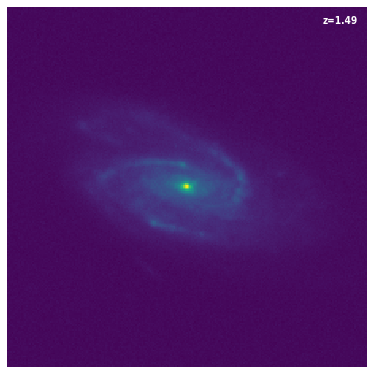

In [44]:

from matplotlib.animation import FuncAnimation

total_number_of_frames = len(all_data_evo)

def animate(frame):
    """
    Animation function. Takes the current frame number (to select the potion of
    data to plot) and a line object to update.
    """

    # Not strictly neccessary, just so we know we are stealing these from
    # the global scope
    global all_data_evo, image

    # We want up-to and _including_ the frame'th element
    image.set_array(all_data_evo[frame])
    image.set_clim(vmin=np.min(all_data_evo[frame]),\
                   vmax=np.max(all_data_evo[frame]))
    text.set_text(f"z={zs_high[frame-1]:4.2f}")

    return image


fig, ax = mpl.subplots(1, figsize=(5, 5))
fig.subplots_adjust(0, 0, 1, 1)
ax.axis("off")

image = ax.imshow(all_data_evo[0], extent=(-1,1,-1,1))
text = ax.text(0.95,0.95,f"z={redshift:4.2f}",color="white",va="top",ha="right",weight="bold")


animation = FuncAnimation(fig, animate, np.arange(total_number_of_frames),\
                          fargs=[],interval=1000 / 10)

animation.save("redshifting_evo.mov", dpi=512)

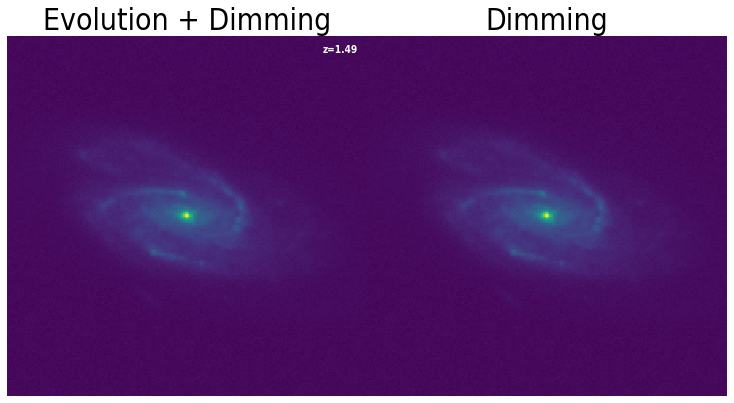

In [45]:
total_number_of_frames = len(all_data_evo)

def animate2(frame):
    """
    Animation function. Takes the current frame number (to select the potion of
    data to plot) and a line object to update.
    """

    # Not strictly neccessary, just so we know we are stealing these from
    # the global scope
    global all_data_evo,all_data_dim, imageEVO, imageDIM

    # We want up-to and _including_ the frame'th element
    imageEVO.set_array(all_data_evo[frame])
    imageEVO.set_clim(vmin=np.min(all_data_evo[frame]),\
                   vmax=np.max(all_data_evo[frame]))
    textEVO.set_text(f"z={zs_high[frame-1]:4.2f}")

    imageDIM.set_array(all_data_dim[frame])
    imageDIM.set_clim(vmin=np.min(all_data_evo[frame]),\
                      vmax=np.max(all_data_evo[frame]))

    return image


fig, ax = mpl.subplots(1,2, figsize=(10, 5))
fig.subplots_adjust(0, 0, 1, 1, wspace=0)

for eixo in ax:
    eixo.axis("off")

imageEVO = ax[0].imshow(all_data_evo[0], extent=(-1,1,-1,1))
textEVO = ax[0].text(0.95,0.95,f"z={redshift:4.2f}",color="white",va="top",ha="right",weight="bold")

imageDIM = ax[1].imshow(all_data_dim[0], extent=(-1,1,-1,1))

ax[0].set_title("Evolution + Dimming")
ax[1].set_title("Dimming")
animation = FuncAnimation(fig, animate2, np.arange(total_number_of_frames),\
                          fargs=[],interval=1000 / 10)

animation.save("redshifting_evoANDdim.mov", dpi=512)

'53.907456'